Exploring Super Store dataset

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [3]:
# Read dataset file
file_path = 'Superstore.xls'
df = pd.read_excel(file_path)

Exploratory Data Analysis with dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=9994, step=1)

In [7]:
df.shape

(9994, 21)

In [8]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [9]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
# How many rows by each category were made
category_counts = df['Category'].value_counts()
category_counts 

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

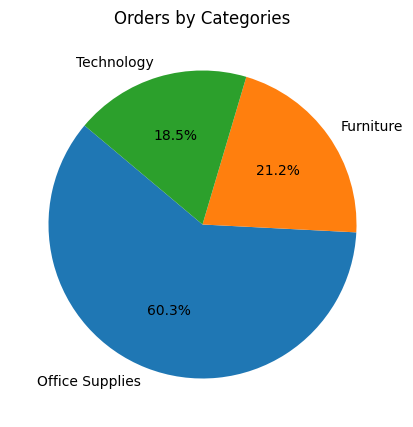

In [13]:
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Orders by Categories')
plt.show()

In [14]:
segments_sales = df.groupby('Segment')['Sales'].sum()
segments_sales

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

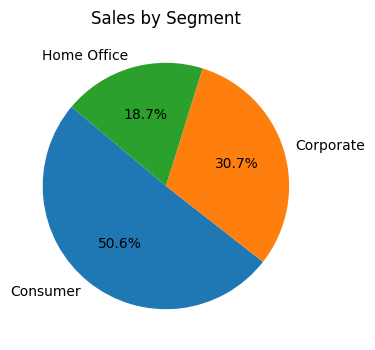

In [15]:
# Sales by Segments
plt.figure(figsize=(4, 4))
plt.pie(segments_sales, labels=segments_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Segment')
plt.show()

In [16]:
sub_category_counts = df['Sub-Category'].value_counts()
sub_category_counts 

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

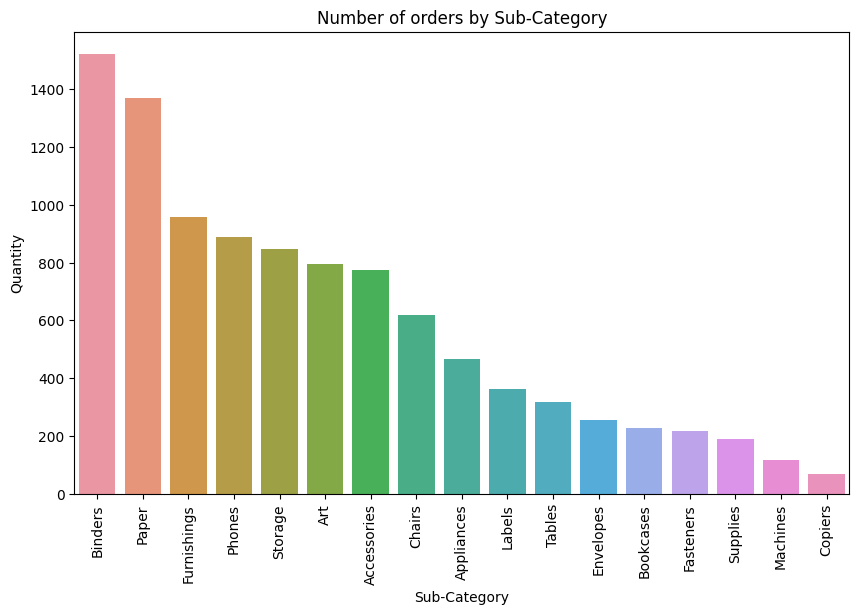

In [17]:
# Number of rows on graph by category
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values)
plt.title('Number of orders by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Quantity')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Total sales by category
category_sales = df.groupby('Category')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
category_sales

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


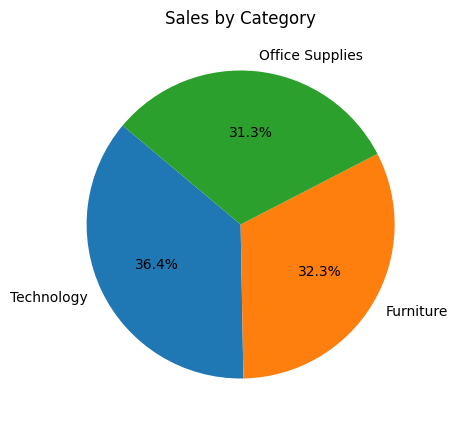

In [19]:
plt.figure(figsize=(5, 5))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Category')
plt.show()

In [20]:
# Total sales by Sub-Category
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sub_category_sales_sort = sub_category_sales.sort_values(by='Sales', ascending=False)
sub_category_sales_sort

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


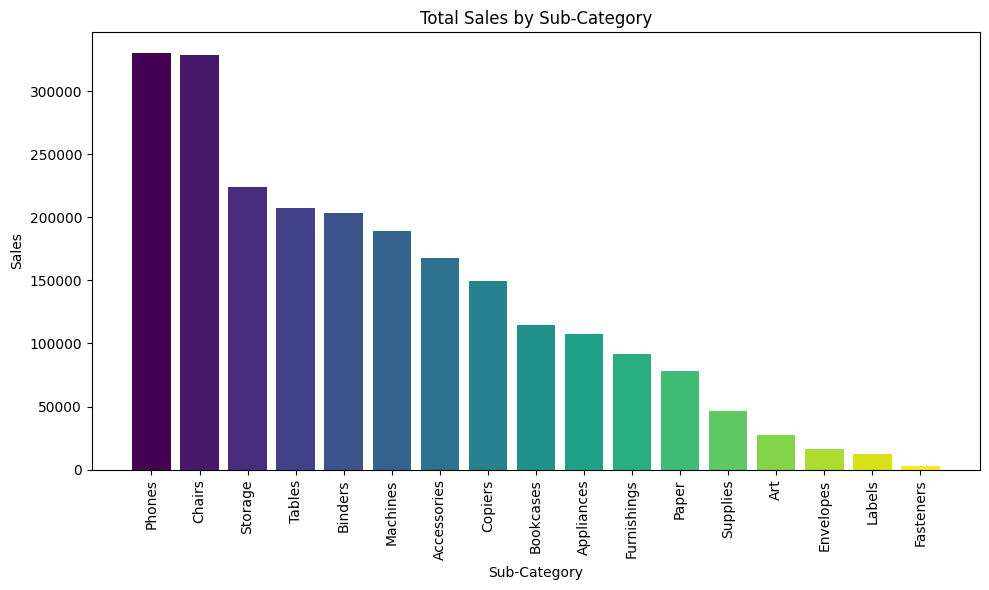

In [23]:
colors = plt.cm.viridis(np.linspace(0, 1, len(sub_category_sales_sort)))

plt.figure(figsize=(10, 6))
plt.bar(sub_category_sales_sort['Sub-Category'], sub_category_sales_sort['Sales'], color=colors)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Total Sales by Sub-Category')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [24]:
# Total profit by Sub-Category
sub_category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
sub_category_profit_sort = sub_category_profit.sort_values(by='Profit', ascending=True)
sub_category_profit_sort

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569
10,Labels,5546.2540
2,Art,6527.7870
7,Envelopes,6964.1767
9,Furnishings,13059.1436
1,Appliances,18138.0054


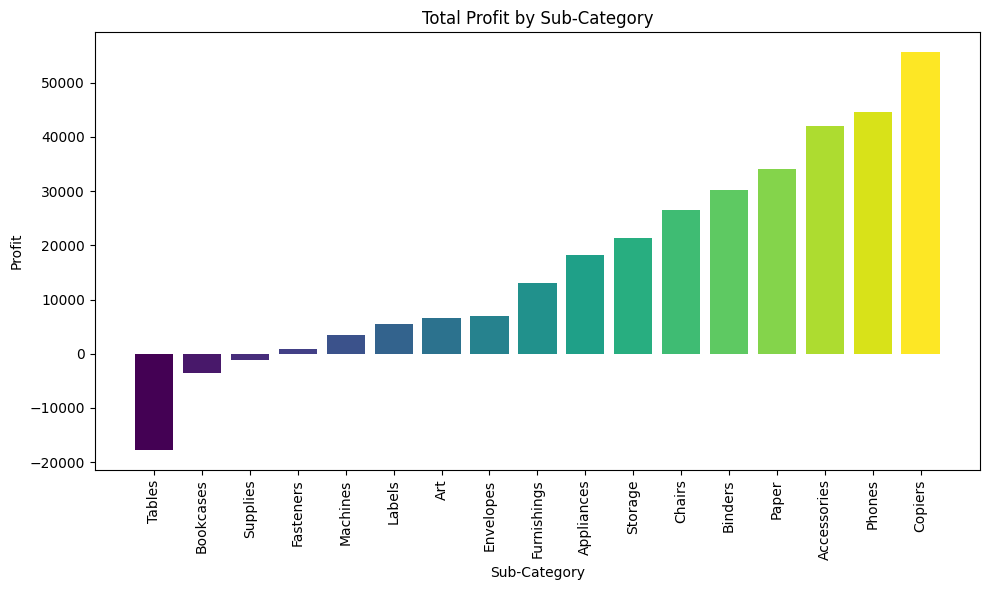

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(sub_category_profit_sort['Sub-Category'], sub_category_profit_sort['Profit'], color=colors)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Total Profit by Sub-Category')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

In [26]:
# Sales per region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
region_sales_sort = region_sales.sort_values(by='Sales', ascending=False)
region_sales_sort

,Region,Sales
3,West,725457.8245
1,East,678781.2400
0,Central,501239.8908
2,South,391721.9050


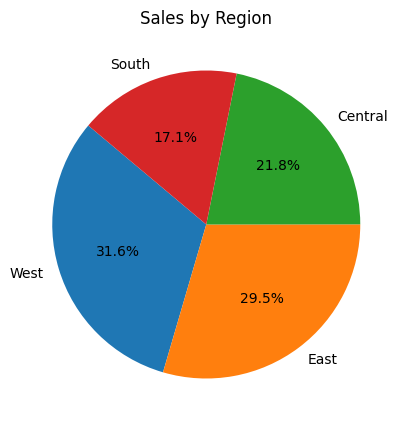

In [27]:
plt.figure(figsize=(5, 5))
plt.pie(region_sales_sort['Sales'], labels=region_sales_sort['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Region')
plt.show()

In [28]:
# Profit per region
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
region_profit_sort = region_profit.sort_values(by='Profit', ascending=False)
region_profit_sort

,Region,Profit
3,West,108418.4489
1,East,91522.7800
2,South,46749.4303
0,Central,39706.3625


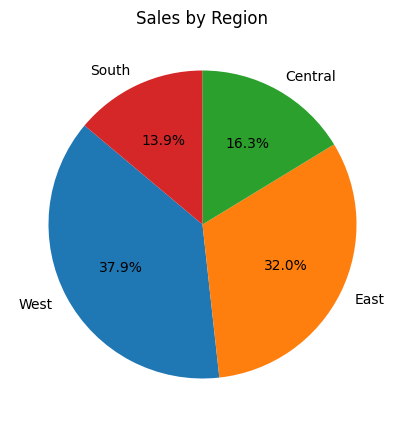

In [29]:
plt.figure(figsize=(5, 5))
plt.pie(region_profit_sort['Profit'], labels=region_sales_sort['Region'], autopct='%1.1f%%', startangle=140)
plt.title('Sales by Region')
plt.show()

In [30]:
# Top-5 states by Sales
top5_states_sales = df.groupby('State')['Sales'].sum().reset_index()
top5_states_sales_sort = top5_states_sales.sort_values(by='Sales', ascending=False).head(5)
top5_states_sales_sort

,State,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140


In [31]:
# Top-5 states by Profit
top5_states_profit = df.groupby('State')['Profit'].sum().reset_index()
top5_states_profit_sort = top5_states_profit.sort_values(by='Profit', ascending=False).head(5)
top5_states_profit_sort

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504


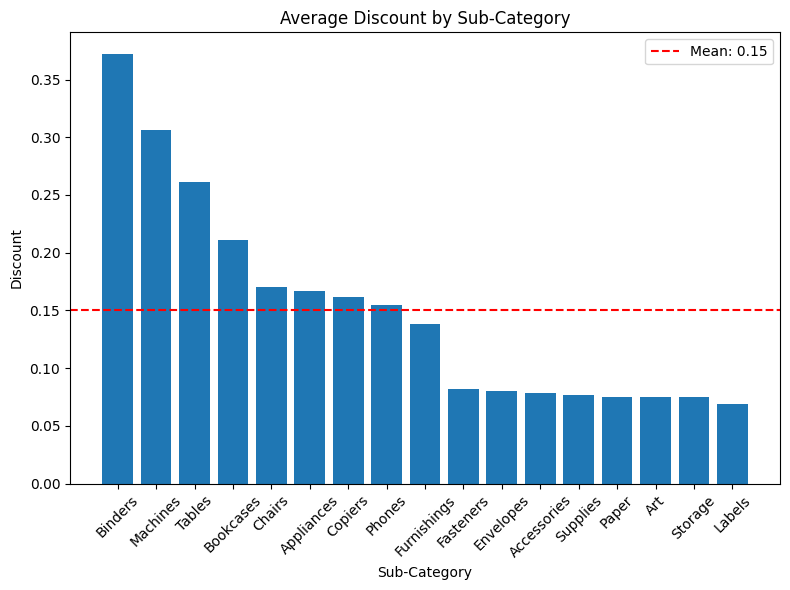

In [62]:
discount = df.groupby('Sub-Category')['Discount'].mean().reset_index()
discount_sorted = discount.sort_values(by = 'Discount', ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(discount_sorted['Sub-Category'], discount_sorted['Discount'])
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.title('Average Discount by Sub-Category')
plt.xticks(rotation=45)

# Discount mean line 
mean_discount = np.mean(discount_sorted['Discount'])
plt.axhline(y=mean_discount, color='r', linestyle='--', label=f'Mean: {mean_discount:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

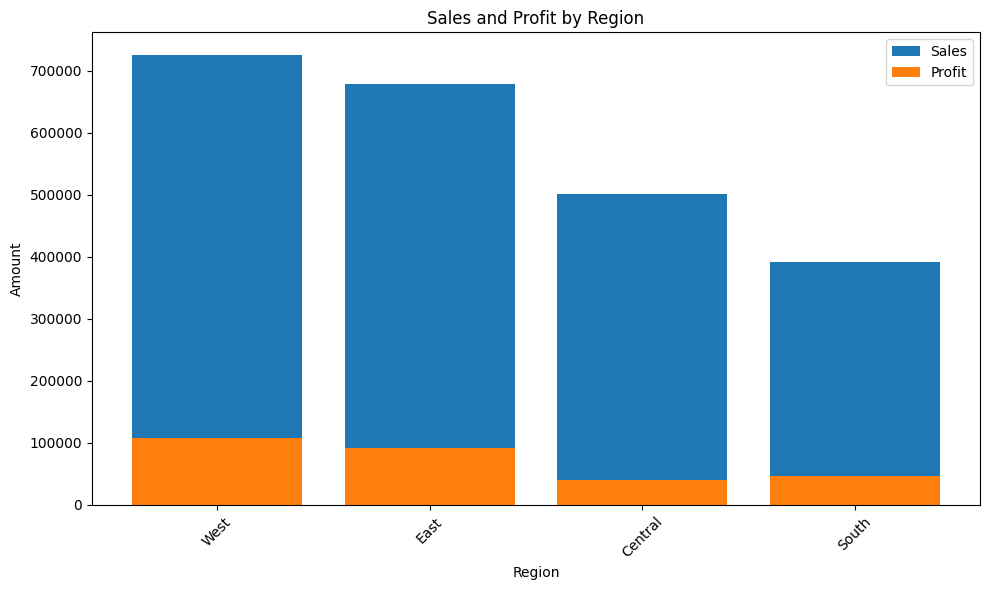

In [32]:
# Sales and Profit on the one graph
region_sales_profit = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
region_sales_profit_sorted = region_sales_profit.sort_values(by='Sales', ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(region_sales_profit_sorted['Region'], region_sales_profit_sorted['Sales'], label='Sales')
plt.bar(region_sales_profit_sorted['Region'], region_sales_profit_sorted['Profit'], alpha=1, label='Profit')

plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profit by Region')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# West region is absolutely lider by Sales an d Profit

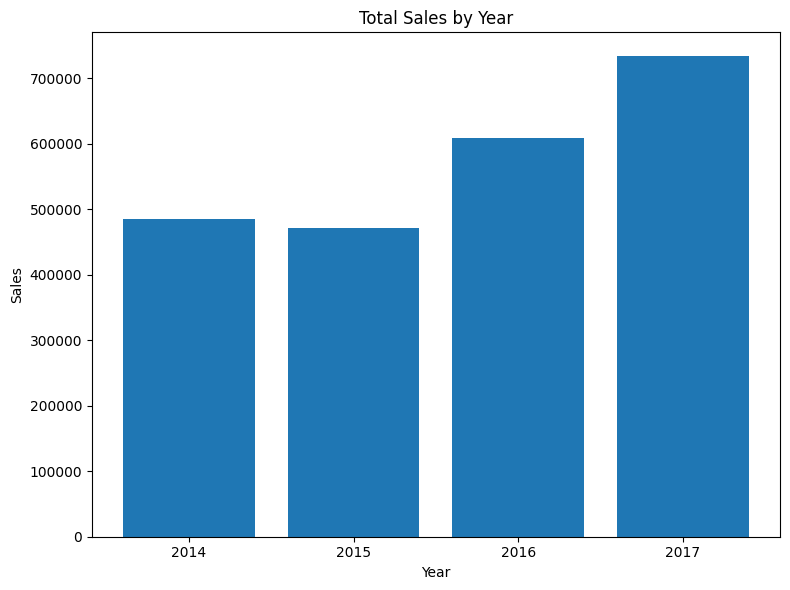

In [33]:
# 'Order Date' column has datetime type and we can take years data and show Sales per Year
df['Year'] = df['Order Date'].dt.year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(sales_by_year['Year'], sales_by_year['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales by Year')
plt.xticks(sales_by_year['Year'])
plt.tight_layout()
plt.show()


In [34]:
# Take Sales per Month the same as Year
df['Month'] = df['Order Date'].dt.month
sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()

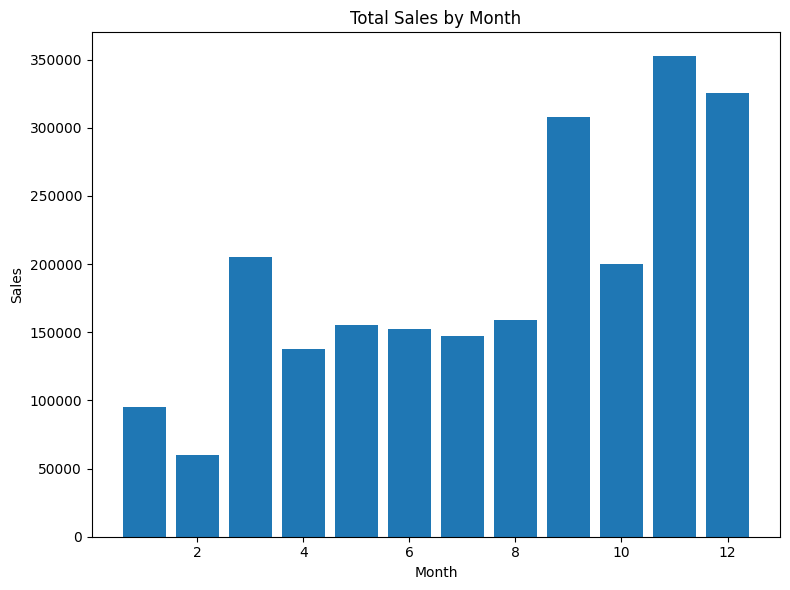

In [35]:
plt.figure(figsize=(8, 6))
plt.bar(sales_by_month['Month'], sales_by_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Total Sales by Month')
plt.tight_layout()
plt.show()

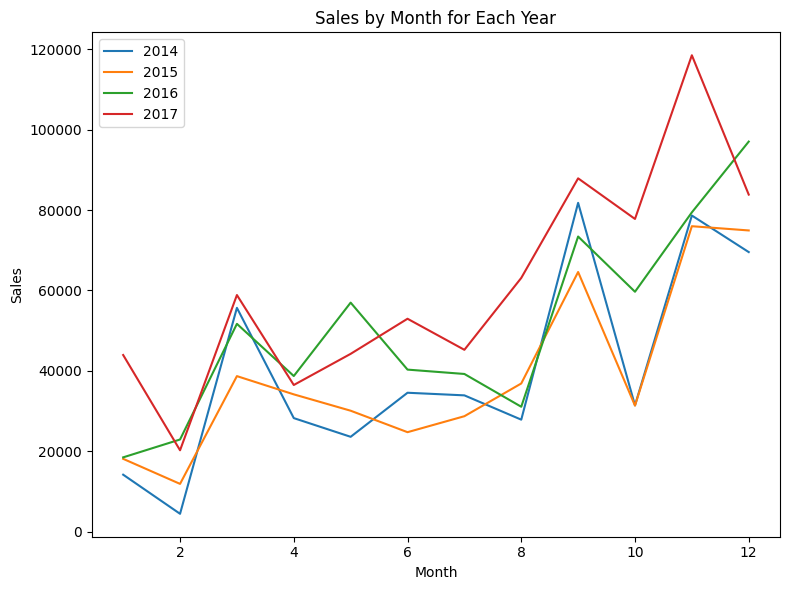

In [36]:
# Show Sales per Month and Years
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

sales_by_year_month = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
for year in sales_by_year_month['Year'].unique():
    year_data = sales_by_year_month[sales_by_year_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Sales'], label=year)

plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month for Each Year')
plt.legend()
plt.tight_layout()
plt.show()


# Here we can track sales trends in lines
# An increase in sales due to start studying year and low tendency in spring-summer

In [37]:
delivery_in_days = (df['Ship Date'] - df['Order Date']).dt.days
delivery_in_days.describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
dtype: float64

In [38]:
# Top-10 Customers by Sales
sales_customer = df.groupby('Customer Name')['Sales'].sum().reset_index()
top_10_sales_customer = sales_customer.nlargest(10, 'Sales')

unique_orders_per_customer = df.groupby('Customer Name')['Order ID'].nunique().reset_index()
unique_orders_per_customer.columns = ['Customer Name', 'Unique Orders']

merge_data_0 = pd.merge(top_10_sales_customer, unique_orders_per_customer, on='Customer Name')

merge_data_0

,Customer Name,Sales,Unique Orders
0,Sean Miller,25043.050,5
1,Tamara Chand,19052.218,5
2,Raymond Buch,15117.339,6
3,Tom Ashbrook,14595.620,4
4,Adrian Barton,14473.571,10
5,Ken Lonsdale,14175.229,12
6,Sanjit Chand,14142.334,9
7,Hunter Lopez,12873.298,6
8,Sanjit Engle,12209.438,11
9,Christopher Conant,12129.072,5


In [39]:
# Top-10 Items by Sales
sales_item = df.groupby('Product Name')['Sales'].sum().reset_index()
top_10_sales_items = sales_item.nlargest(10, 'Sales')

sales_items_count = df.groupby('Product Name')['Quantity'].sum().reset_index()

merge_data_1 = pd.merge(top_10_sales_items, sales_items_count, on = 'Product Name')

top_10_sales_items_merged = merge_data_1.nlargest(10, 'Quantity')
top_10_sales_items_merged

,Product Name,Sales,Quantity
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500,48
3,HON 5400 Series Task Chairs for Big and Tall,21870.576,39
6,Hewlett Packard LaserJet 3310 Copier,18839.686,38
4,GBC DocuBind TL300 Electric Binding System,19823.479,37
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384,31
8,GBC DocuBind P400 Electric Binding System,17965.068,27
0,Canon imageCLASS 2200 Advanced Copier,61599.824,20
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895,12
9,High Speed Automatic Electric Letter Opener,17030.312,11
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480,6


In [40]:
# Top-10 Best seller items by sold
total_qty_sold = df.groupby('Product Name')['Quantity'].sum().reset_index()
best_selling_items = total_qty_sold.nlargest(10, 'Quantity')

best_selling_items.head(10)

,Product Name,Quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal L...,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


Add 'Return' sheet from the file and make small EDA

In [41]:
df_returned = pd.read_excel(file_path, sheet_name='Returns') 

In [42]:
df_returned.head(5)

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [43]:
df_returned.columns

Index(['Returned', 'Order ID'], dtype='object')

In [44]:
df_returned.describe()

,Returned,Order ID
count,296,296
unique,1,296
top,Yes,CA-2017-153822
freq,296,1


In [45]:
df_returned.duplicated().sum()

0

In [46]:
df_returned.isnull().sum()

Returned    0
Order ID    0
dtype: int64

In [47]:
# Calcucate % returned orders
uniq_orders = df['Order ID'].nunique()
uniq_orders_returned = df_returned['Order ID'].nunique()

percent_of_returned = round((uniq_orders_returned / uniq_orders) * 100, 2)
percent_of_returned

5.91

Add 'People' sheet from the file and make small EDA

In [48]:
df_people = pd.read_excel(file_path, sheet_name='People') 

In [49]:
df_people.head(5)

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [50]:
df_people.describe()

# Its all info from this sheet. I guess this sheet contents region managers

,Person,Region
count,4,4
unique,4,4
top,Anna Andreadi,West
freq,1,1
